In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
Data_path = "Fertilizer Prediction.csv"

In [3]:
df = pd.read_csv(Data_path)
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
# Statistical info
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [5]:
# Datatypes of Attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [6]:
# Check the unique values in dataset
df.apply(lambda x: len(x.unique()))

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

### Preprocessing the Dataset

In [7]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [8]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Soil Type', 'Crop Type', 'Fertilizer Name']

In [9]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Soil Type
Soil Type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

Crop Type
Crop Type
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

Fertilizer Name
Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64



### Exploratory Data Analysis

<Axes: xlabel='count', ylabel='Soil Type'>

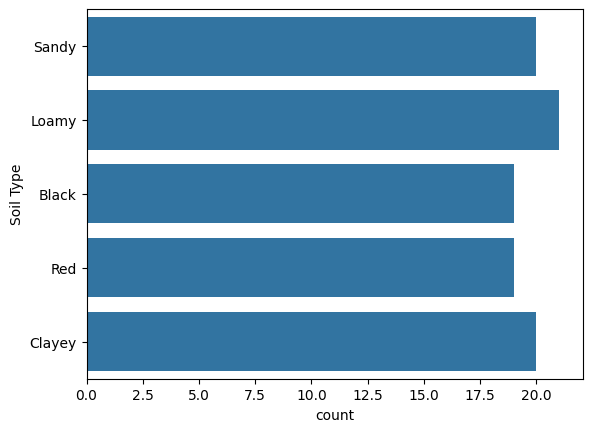

In [10]:
sns.countplot(df['Soil Type'])

<Axes: xlabel='count', ylabel='Crop Type'>

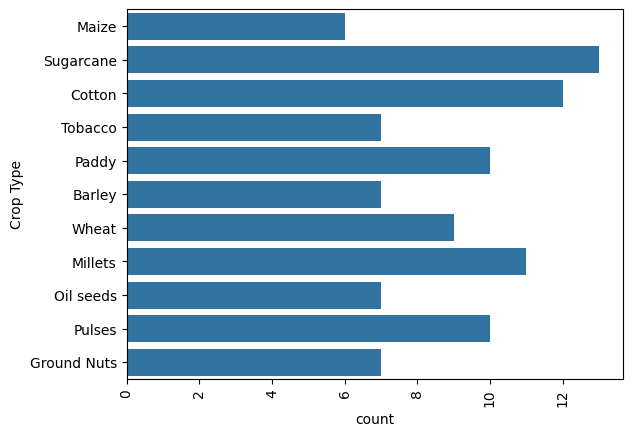

In [11]:
plt.xticks(rotation=90)
sns.countplot(df['Crop Type'])

<Axes: xlabel='count', ylabel='Fertilizer Name'>

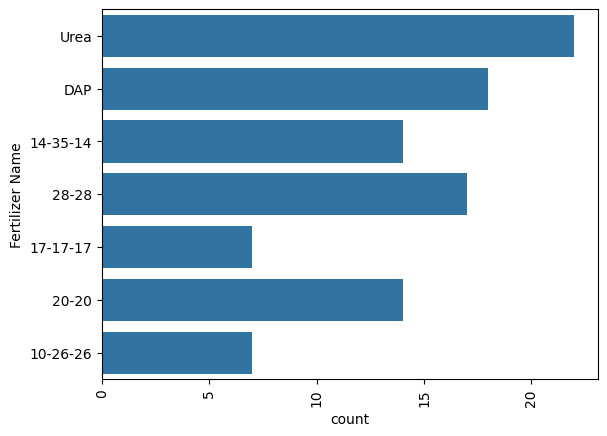

In [12]:
plt.xticks(rotation=90)
sns.countplot(df['Fertilizer Name'])

In [13]:
# Defining function for Continuous and Catogorical variable

def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Distribution')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with Output Variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with Output Variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

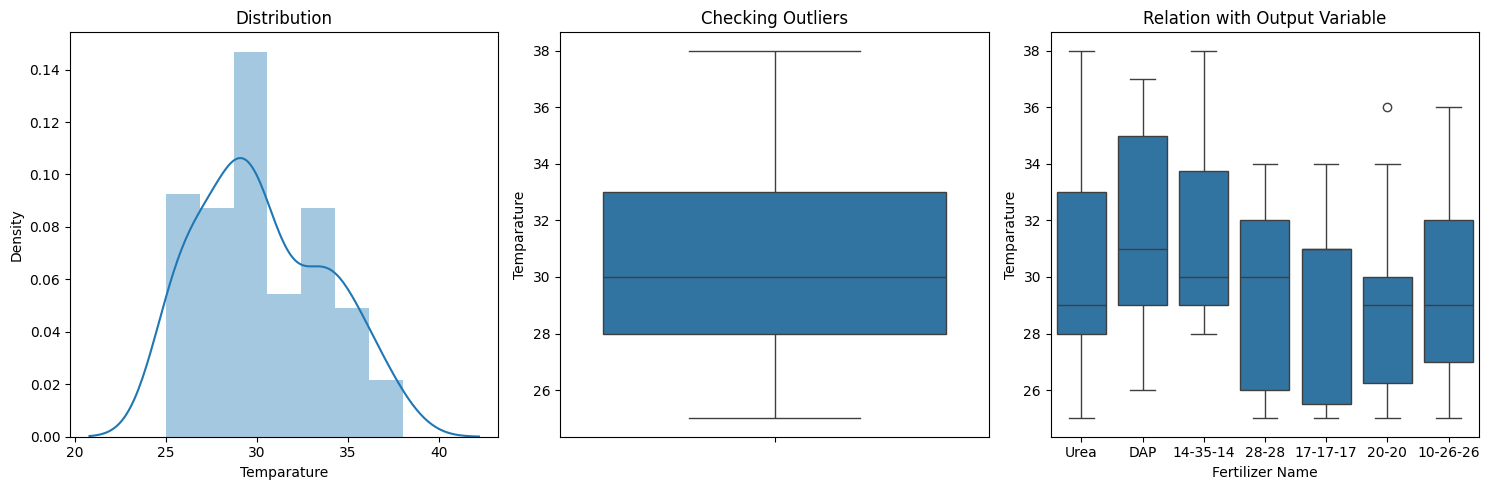

In [14]:
# EDA - Temparature variable
plot_conti(df['Temparature'])

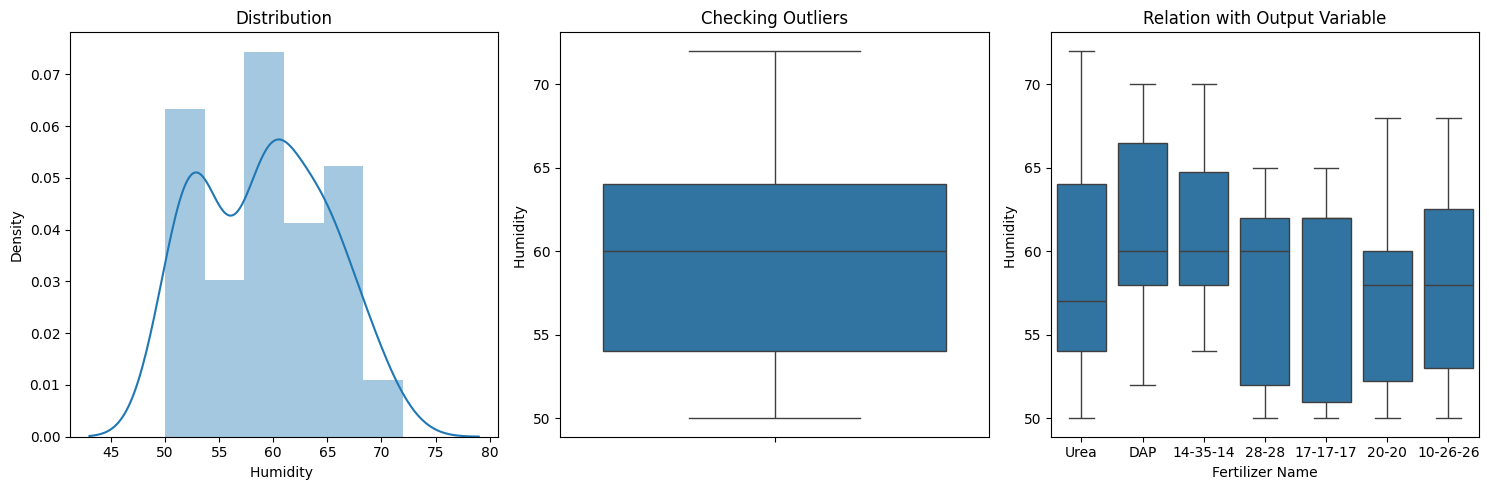

In [15]:
# EDA - Humidity variable
plot_conti(df['Humidity '])

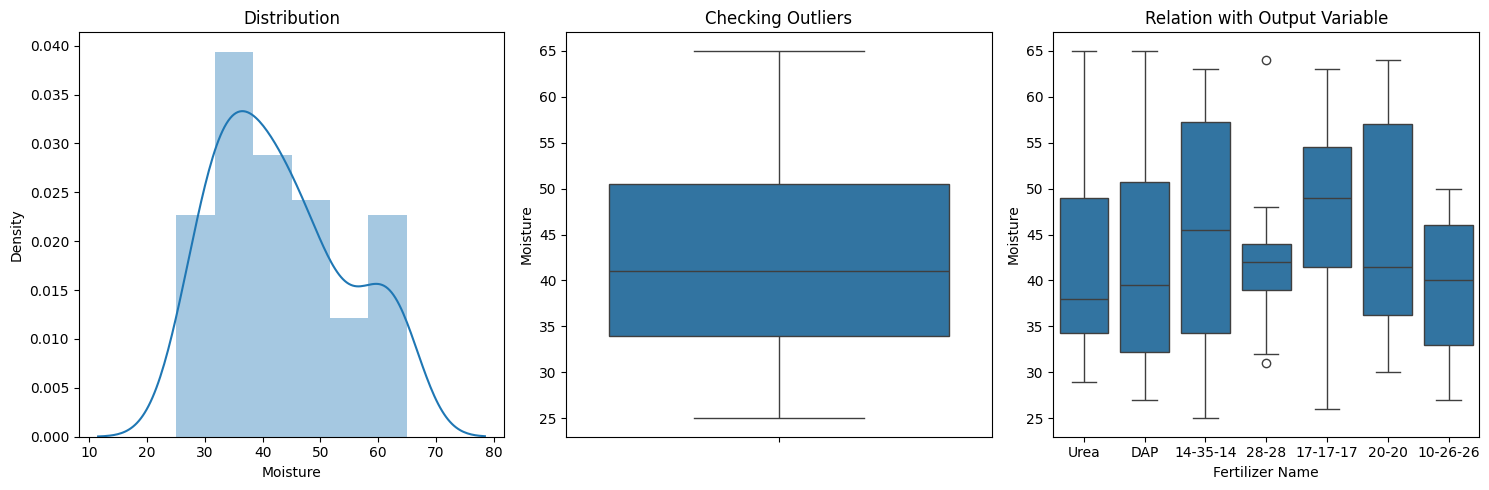

In [16]:
# EDA - Moisture variable
plot_conti(df['Moisture'])

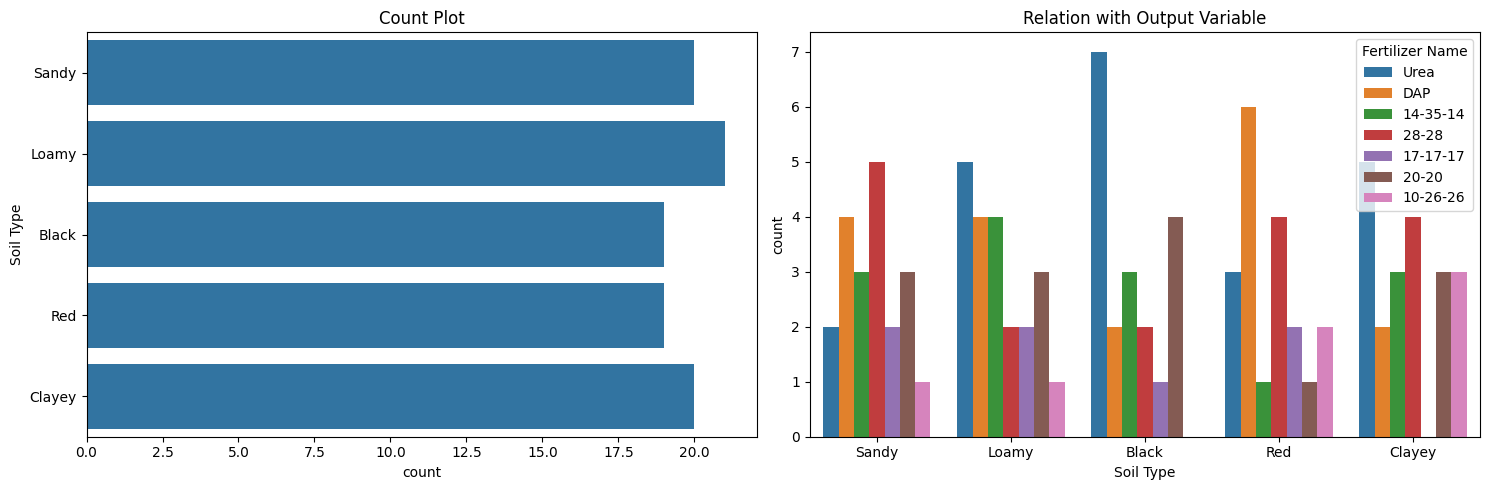

In [17]:
plot_cato(df['Soil Type'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

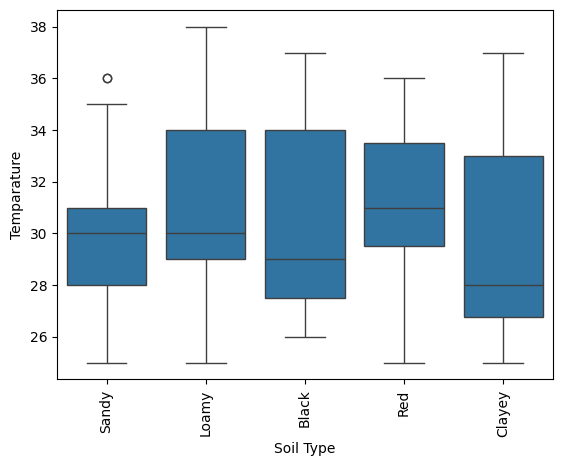

In [18]:
# Relation of Soil Type with Temperature 
plt.xticks(rotation=90)
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

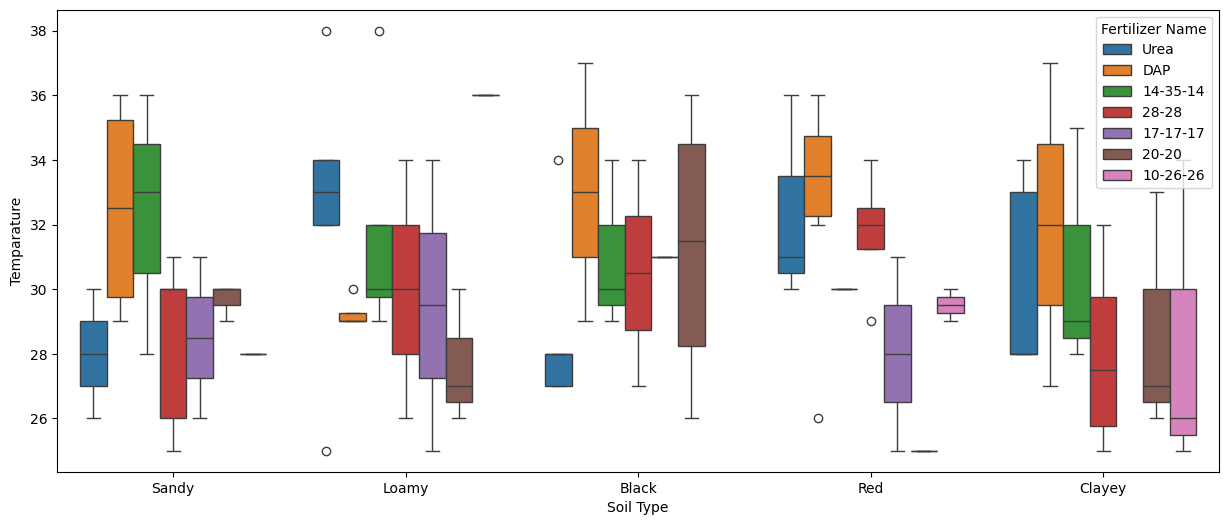

In [19]:
# Relation of Soil Type and Temperature with Output Variable
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'],hue=df['Fertilizer Name'])

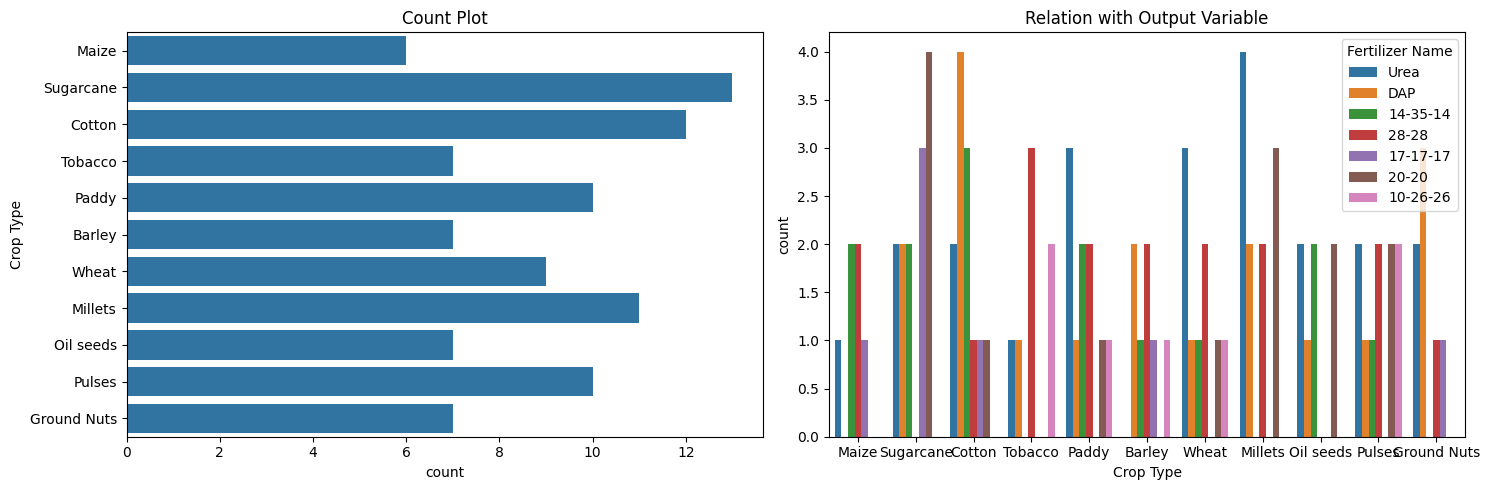

In [20]:
# EDA - Crop Type variable
plot_cato(df['Crop Type'])

<Axes: xlabel='Crop Type', ylabel='Temparature'>

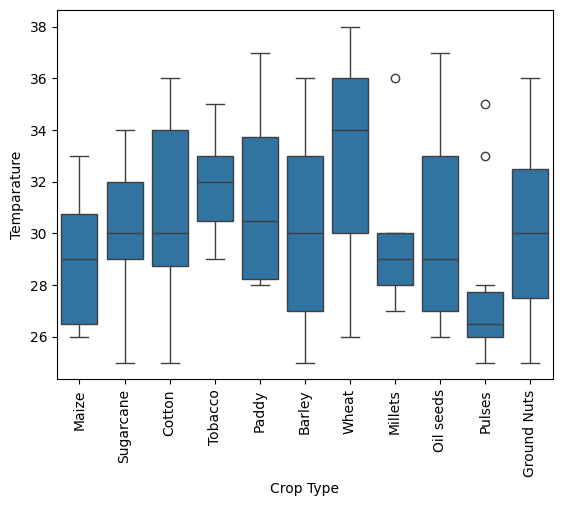

In [21]:
# Relation of Crop Type with temperature
plt.xticks(rotation=90)
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

<Axes: xlabel='Crop Type', ylabel='Humidity '>

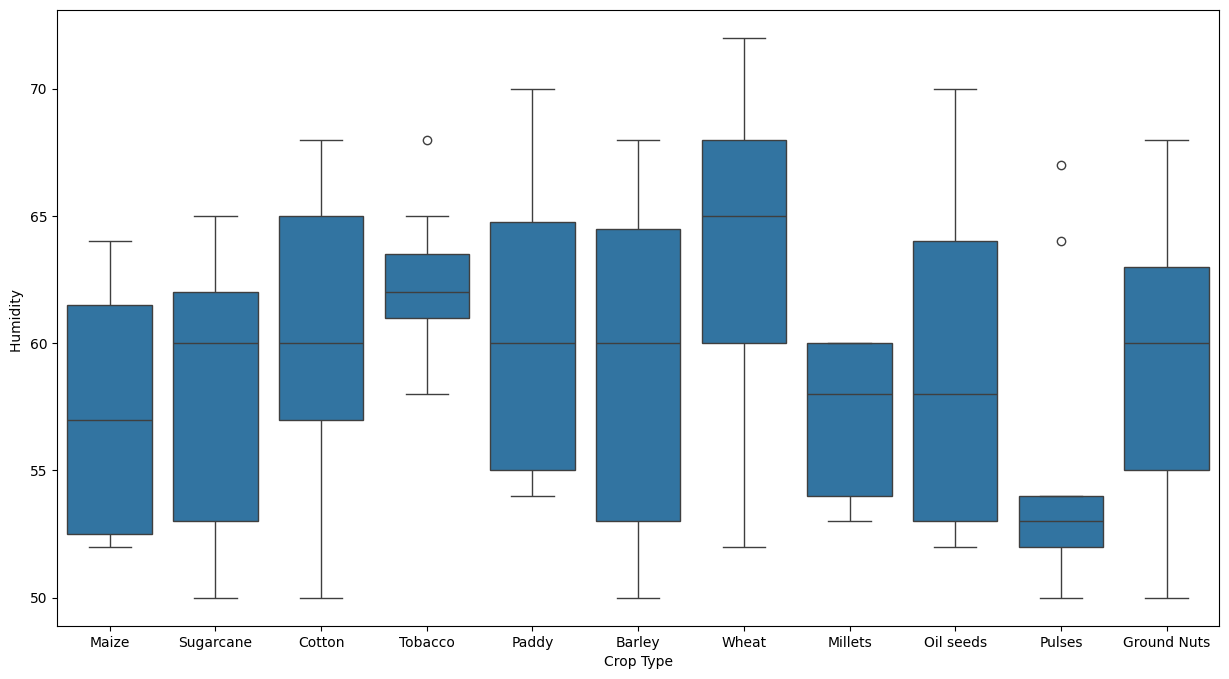

In [22]:
# Relation of Crop Type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Humidity '])

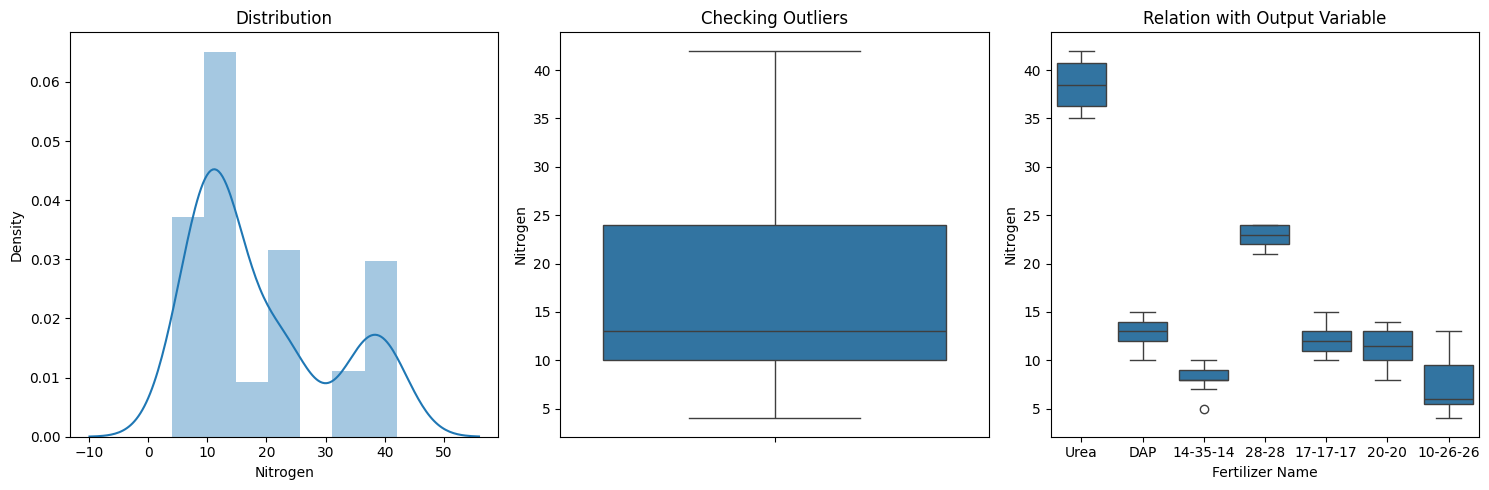

In [23]:
# EDA - Nitrogen variable
plot_conti(df['Nitrogen'])

<Axes: xlabel='Crop Type', ylabel='Nitrogen'>

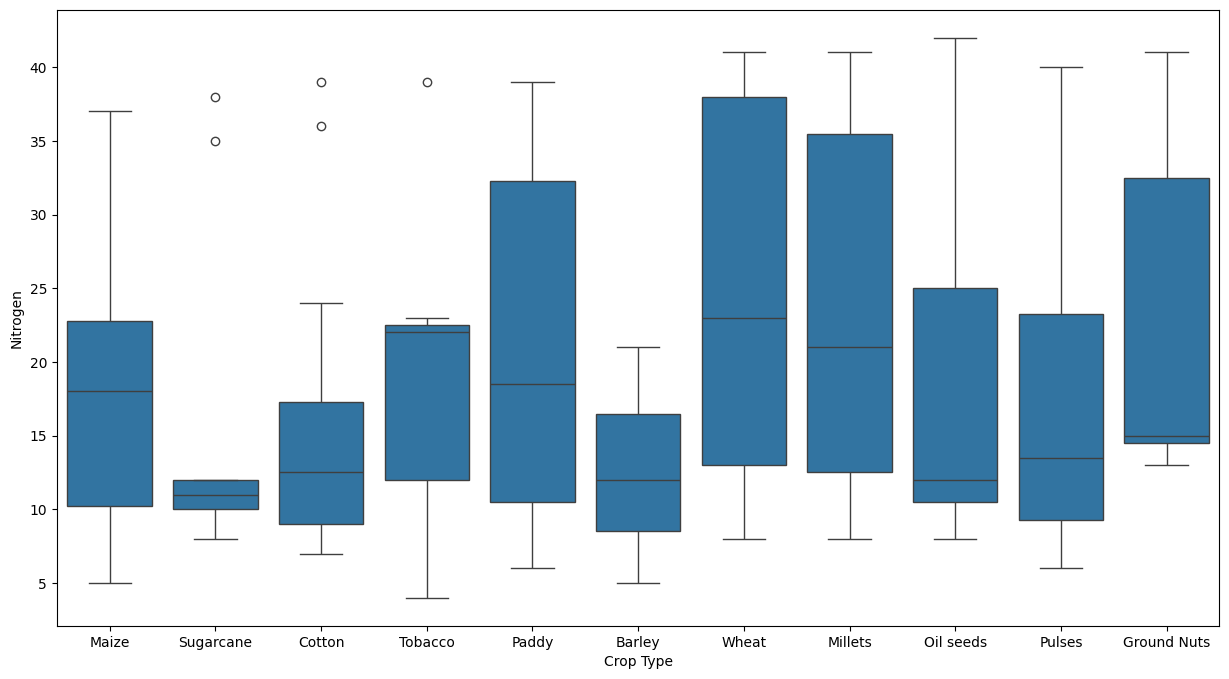

In [24]:
# Relation of Nitrogen wrt to Crop Type
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Nitrogen'])

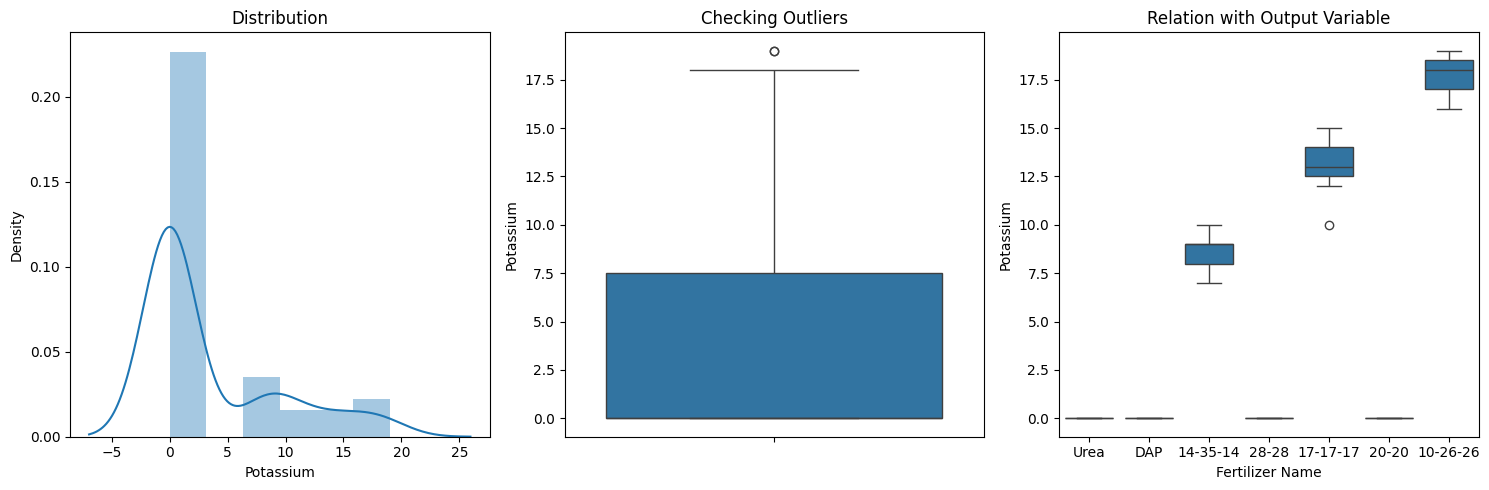

In [25]:
# EDA - Potassium variable
plot_conti(df['Potassium'])

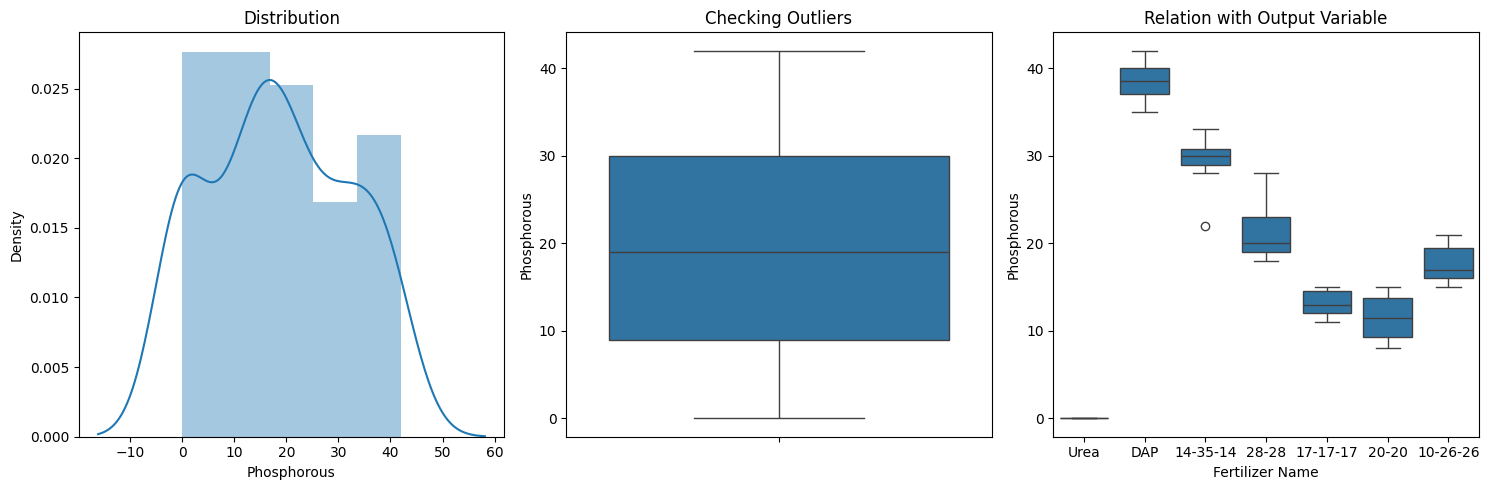

In [26]:
# EDA - Phosphorous variable
plot_conti(df['Phosphorous'])

## Correlation Matrix

### Input split

In [41]:
# Check the number of zeroes in a Column
# Delete or Drop columns if zero values are more than 50%

sum(df['Potassium'] == 0)

71

In [40]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [42]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [49]:
X = df[['Soil Type']]
y = df['Crop Type']

In [51]:
X

,Soil Type
0,Sandy
1,Loamy
2,Black
3,Red
4,Clayey
...,...
94,Clayey
95,Red
96,Loamy
97,Sandy


### Encoding Categorical Data

* Independent Variable
  - OneHotEncoder

* Dependent Variable
  - LebelEncoder

In [55]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
X = label_encoder.fit_transform(X)


In [56]:

X.shape

(99,)

### Splitting the dataset into the Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
# Initializing empty lists to append all model's name and corresponding name
accuracy = []
model = []

### Training the Model on the Training set

## K - Nearest Neighbors

In [61]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_knn, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_knn)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc1 = accuracy_score(y_test, y_pred)
accuracy.append(acc1)
model.append('K-Nearest Neighbors')
print("K-Nearest Neighbours's Accuracy :", acc1)



# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1 0 1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]]
K-Nearest Neighbours's Accuracy : 0.25
              precision    recall  f1-score   support

      Barley       0.50      0.50      0.50         2
      Cotton       1.00      0.67      0.80         3
 Ground Nuts       0.00      0.00      0.00         2
       Maize       0.00      0.00      0.00         0
     Millets       0.00      0.00      0.00         2
   Oil seeds       0.00      0.00      0.00         1
       Paddy       0.00      0.00      0.00         4
      Pulses       1.00      0.67      0.80         3
   Sugarcane       0.00      0.00      0.00         0
     Tobacco       0.00      0.00      0.00         2
       Wheat       0.00      0.00      0.00         1

    accuracy                       

## Naive Bayes

In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc4 = accuracy_score(y_test, y_pred)
accuracy.append(acc4)
model.append('Decision Tree Classification')
print("Decision Tree Classification's Accuracy :", acc4)

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 3. 3. 2. 3. 3. 0. 0. 4. 1. 1. 2. 1. 0. 2. 0. 2. 4. 3. 2. 2. 3. 2.
 1. 0. 4. 1. 3. 4. 0. 3. 4. 2. 0. 3. 4. 0. 0. 1. 1. 2. 0. 4. 3. 1. 1. 4.
 3. 2. 2. 1. 4. 2. 4. 4. 4. 4. 2. 2. 4. 1. 4. 0. 4. 3. 2. 2. 1. 0. 2. 2.
 2. 0. 3. 2. 0. 1. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Model Accuracy

<Axes: >

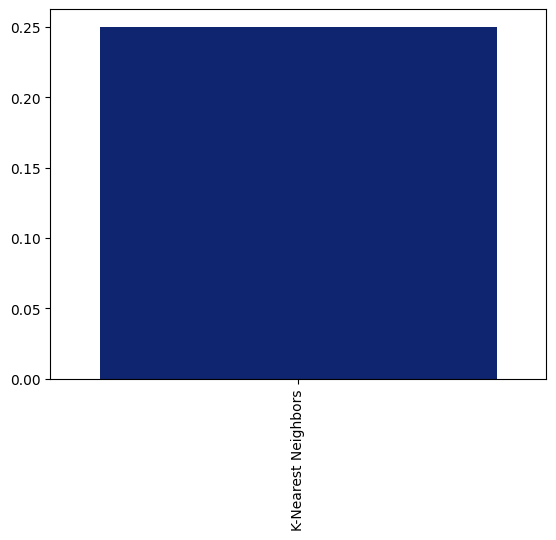

In [70]:
plt.xticks(rotation=90)
sns.barplot(x = model, y = accuracy, palette ='dark')

In [71]:
import pickle
pickle.dump(model,open('yield.pkl','wb'))
model=pickle.load(open('yield.pkl','rb'))

AttributeError: 'list' object has no attribute 'predict'